## Modelo para predecir si un pasajero sobrevive o no utilizando modelos de clasificación

### Importando librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore")


### Importando el dataset

> Importando datos de train, test y gender_submission

In [2]:
df_train = pd.read_csv ("train_titanic.csv")
test = pd.read_csv ("test_titanic.csv")
gender_submission = pd.read_csv ("gender_submission.csv").drop(columns = "PassengerId")
df_test = pd.concat ([test, gender_submission], axis = 1)

### Observando el conjunto de datos de entrenamiento

> Imprimimos las primeras y últimas 5 observaciones

> Observamos que hay 891 observaciones, 11 atributos y un vector objetivo

In [3]:
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Pequeño resumen de los atributos:

1. **`PassengerId`:** Índice único para cada pasajeros.
2. **`Survived`:** Muestra si el pasajero sobrevivió o no. 1 si lo hizo y 0 si no

3. **`Pclass`:** 1 para 1era clase. 2 para 2da clase. 3 para 3era clase.

4. **`Name`:** Nombre del pasajero, puede tener un "Mr" para hombre adulto. "Mrs" para mujer adulta. "Miss" para niña. "Master" para niño.

5. **`Sex`:** Sexo del pasajero

6. **`Age`:** Edad del pasajero

7. **`SibSp`:** Número de hermanos o cónyuges que viajan con el pasajero.
8. **`Parch`:** Número de padres de niños que viajan con cada pasajero.
9. **`Ticket`:** Numero del ticket.
10. **`Fare`:** Cuanto pagó el pasajero por su viaje.
11. **`Cabin`:** Número de cabina del pasajero
12. **`Embarked`:** Puerto por el que embarcó

### Método describe() en el dataset

> El método describe() puede mostrar diferentes valores, como la cantidad, promedio, desviación estándard, valor mínimo, etc. de las variables numéricas

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> Esta variación del método describe() nos muestra algunos valores de las variables categóricas o del tipo objeto, como la cantidad, frecuencia del más repetido

> Observamos que hay 577 hombres, 644 pasajeros embarcaron en el puerto S

In [5]:
df_train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Método info()

> Aplicamos este método para ver el tipo de dato y la cantidad de nulos de los atributos

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> Podemos ver la cantidad de datos nulos de cada atributo

> 177 datos faltantes en Age, 687 datos faltantes en Cabin y 2 datos faltantes en Embarked

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Observando el conjunto de datos de prueba

> Imprimimos las primeras y últimas 5 observaciones

> Observamos que hay 418 observaciones, 11 atributos y un vector objetivo

In [8]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


### Método describe() en el dataset

> El método describe() puede mostrar diferentes valores, como la cantidad, promedio, desviación estándard, valor mínimo, etc. de las variables numéricas

In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.377990
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.485466
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


> Esta variación del método describe() nos muestra algunos valores de las variables categóricas o del tipo objeto, como la cantidad, frecuencia del más repetido

> Observamos que hay 577 hombres, 644 pasajeros embarcaron en el puerto S

In [10]:
df_test.describe(include = "O")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Método info()

> Aplicamos este método para ver el tipo de dato y la cantidad de nulos de los atributos

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


> Podemos ver la cantidad de datos nulos de cada atributo

> 86 datos faltantes en Age, 1 dato faltante en Fare y 327 datos faltantes en Cabin

In [12]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

### Relaciones entre atributos y el vector objetivo

> En el conjunto de entrenamiento sobrevivieron 342 de 891 pasajeros que corresponden al 38,4%

> En el conjunto de pueba sobrevivieron 152 de 418 pasajeros que corresponden al 36,4%

In [13]:
def get_pctje_survived (df, var) :
    survived = df[df[var] == 1]
    not_survived = df[df[var] == 0]

    print ("Sobrevivieron: %i (%.1f%%)"%(len(survived), float(len(survived))/len(df)*100.0))
    print ("No Sobrevivieron: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(df)*100.0))
    print ("Total: %i"%len(df))

In [14]:
get_pctje_survived (df_train, "Survived")

Sobrevivieron: 342 (38.4%)
No Sobrevivieron: 549 (61.6%)
Total: 891


In [15]:
get_pctje_survived (df_test, "Survived")

Sobrevivieron: 158 (37.8%)
No Sobrevivieron: 260 (62.2%)
Total: 418


### Pclass vs Survived

> Vemos que hay 216 pasajeros de la clase 1

> 184 pasajeros de clase 2

> y 491 pasajeros de clase 3

In [16]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

> Se observa claramente como la mayoría de los pasajeros que se salvaron corresponden a la 1era clase

> Se observa como la mayoría de los pasajeros que no se salvaron corresponden a la 3era clase

In [17]:
def cant_y_graph (var1, var2, df) :
    cantidad = df.groupby ([var1, var2]).size()
    fig, ax = plt.subplots()
    bars = cantidad.unstack(level=0).plot(kind='bar', subplots=False, rot=0, ax=ax)

    # Obtener las alturas de las barras
    bar_heights = [bar.get_height() for bar in bars.patches]

    # Agregar la cantidad sobre cada barra
    for i, bar in enumerate(bars.patches):
        height = bar.get_height()
        ax.annotate(str(int(bar_heights[i])),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center',
                    va='bottom')
    return (cantidad)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

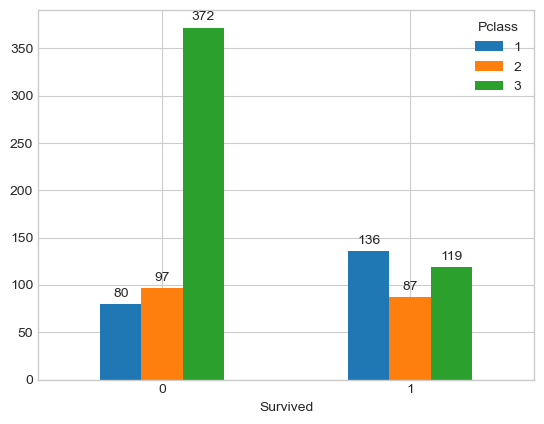

In [18]:
cant_y_graph ("Pclass", "Survived", df_train)

> Se observa como la 1era clase tiene una tasa de sobrevivencia más alta que los de la 3era clase

In [19]:
def tasa_y_graph (var1, var2, df) :
    tasa = df[[var1, var2]].groupby([var1], as_index = False).mean()
    sns.barplot (x = var1, y = var2, data = df, ci = None)
    plt.title (f"Tasa de Sobrevivencia según {var1}")
    return (tasa)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


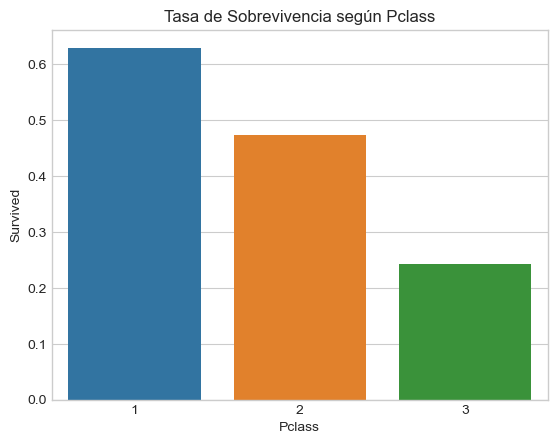

In [20]:
tasa_y_graph ("Pclass", "Survived", df_train)

### Sex y Survival

In [21]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

> Se observa claramente como la mayoría de los pasajeros que se salvaron corresponden a mujeres



Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

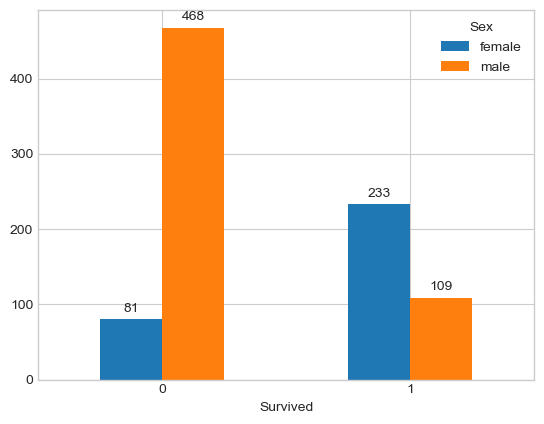

In [22]:
cant_y_graph ("Sex", "Survived", df_train)

,Sex,Survived
0,female,0.742038
1,male,0.188908


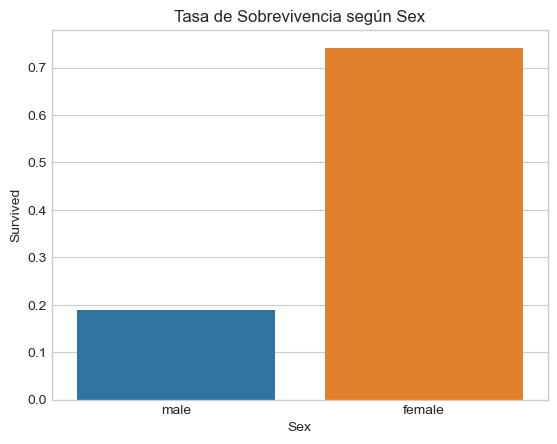

In [23]:
tasa_y_graph ("Sex", "Survived", df_train)

> Las mujeres tienen una mejor chance de sobrevivencia

### Pclass y sex vs Survived

In [24]:
tab = pd.crosstab(df_train['Pclass'], df_train['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


> El siguiente gráfico nos indica cuántos hombres y mujeres hay por cada clase

Text(0, 0.5, 'Percentage')

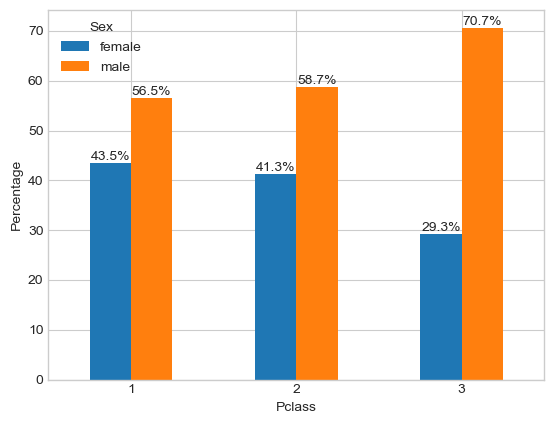

In [25]:
tab = pd.crosstab(df_train['Pclass'], df_train['Sex'])
tab_percent = tab.div(tab.sum(1), axis=0) * 100
ax = tab_percent.plot(kind="bar", stacked=False, rot = 0)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.xlabel('Pclass')
plt.ylabel('Percentage')


> Vemos claramente como las mujeres de la clase 1 y 2 son las que tienen mejores chances de sobrevivencia

> Las chances de sobreviviencia de un hombre de la clase 1 son 13% menores que las de una mujer de 3era clase

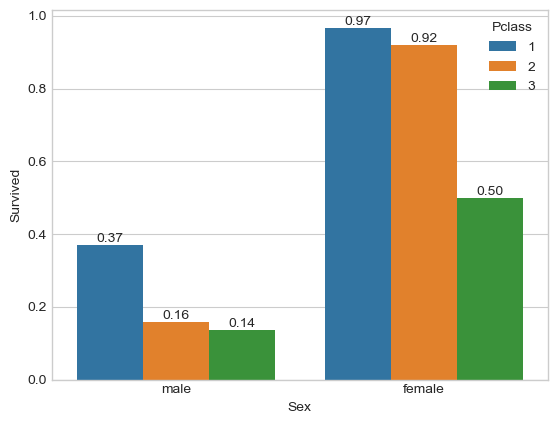

In [26]:
ax = sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train, ci = None)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

### Pclass, sex, embarked vs Survived

> La mayoría de las mujeres de la clase 1 y 2 sobrevivieron

> En los hombres casi no hay diferencias


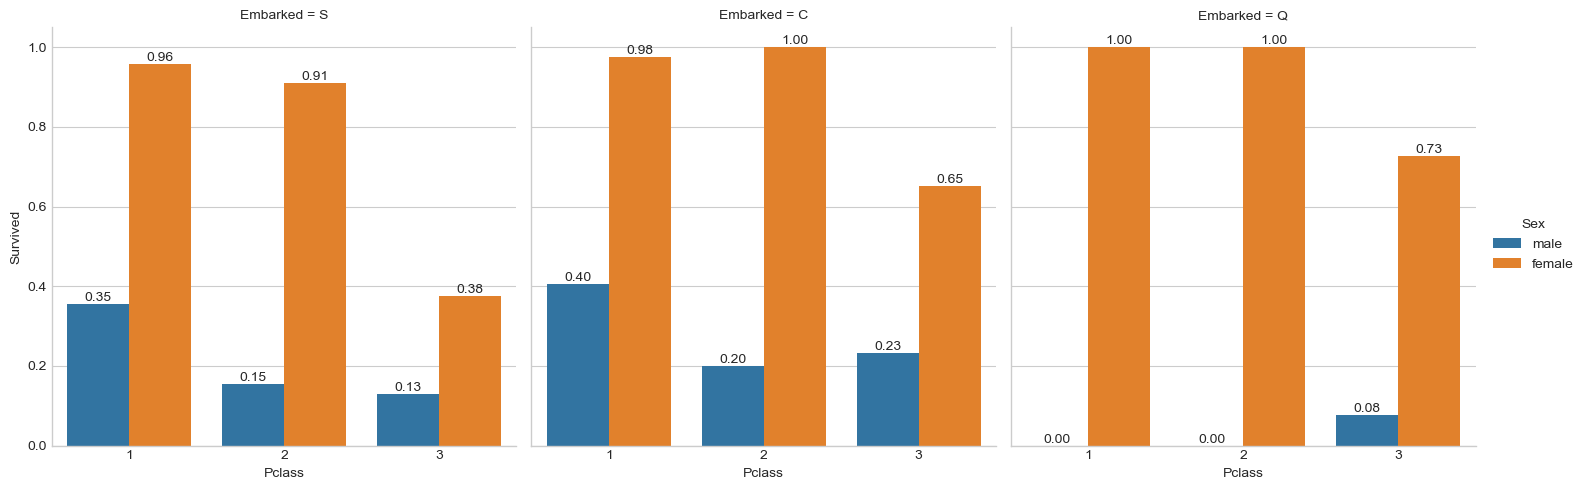

In [27]:
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=df_train, kind='bar', ci = None)

for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

### Embarked vs survived

In [28]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

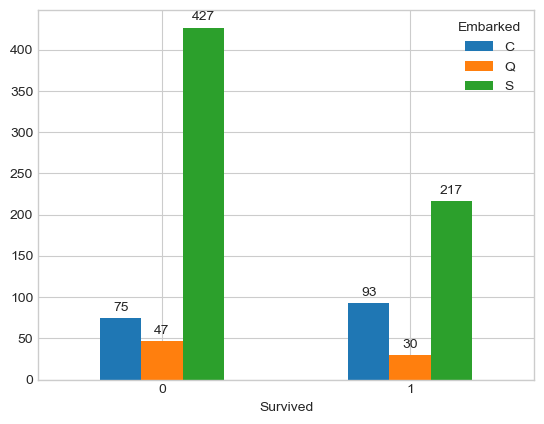

In [29]:
cant_y_graph ("Embarked", "Survived", df_train)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


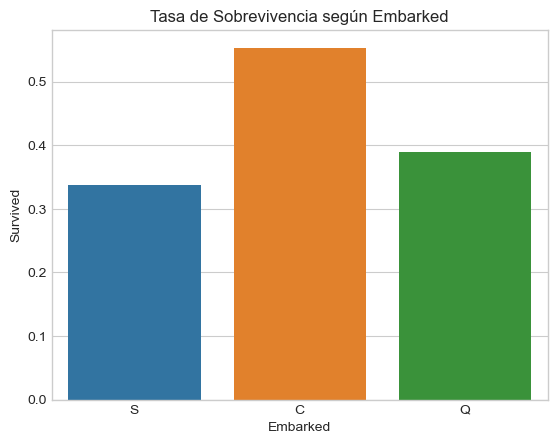

In [30]:
tasa_y_graph ("Embarked", "Survived", df_train)

### Parch vs Survived

In [31]:
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
dtype: int64

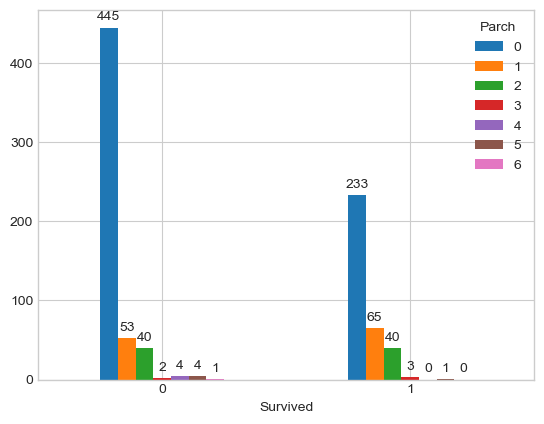

In [32]:
cant_y_graph ("Parch", "Survived", df_train)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


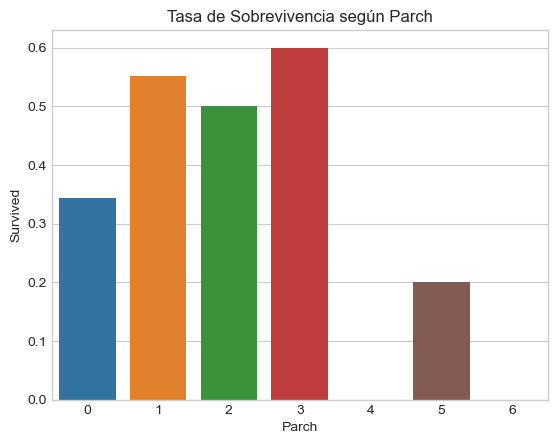

In [33]:
tasa_y_graph ("Parch", "Survived", df_train)

### Sib vs Survived

In [34]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
dtype: int64

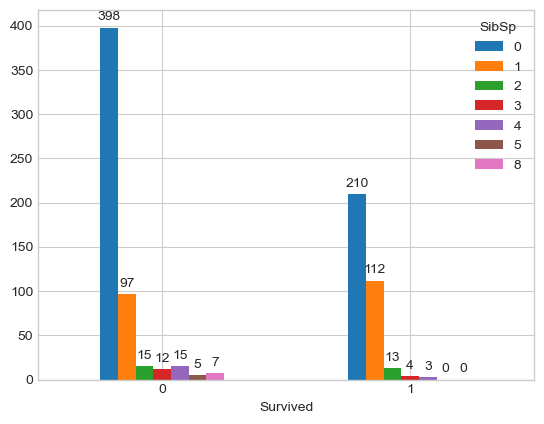

In [35]:
cant_y_graph ("SibSp", "Survived", df_train)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


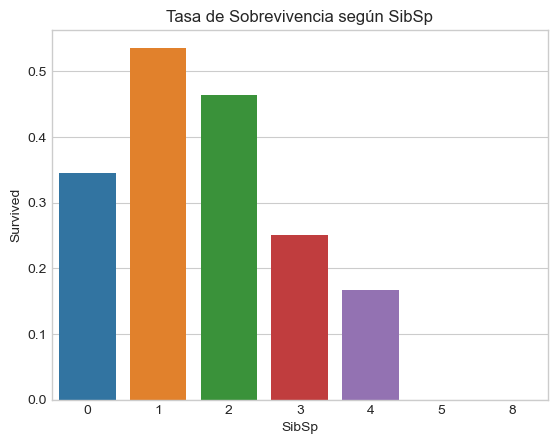

In [36]:
tasa_y_graph ("SibSp", "Survived", df_train)

### Age vs survived

> 1era clase tiene muy pocos niños en comparación con las otras 2 clases

> 1era clase tiene más gente mayor en comparación con las otras 2 clases

> La mayoría de los niños entre 0 y 10 años de la 2da clase sobrevivieron

> La mayoría de los niños de la 3era clase sobrevivieron

> La gente joven de la 1era clase sobrevivió más que los de mayor edad

> La mayoría de los niños hombres sobrevivieron

> Las mujeres de entre 18 a 40 años tienen una mejor chance de sobreviviencia

<AxesSubplot:xlabel='Sex', ylabel='Age'>

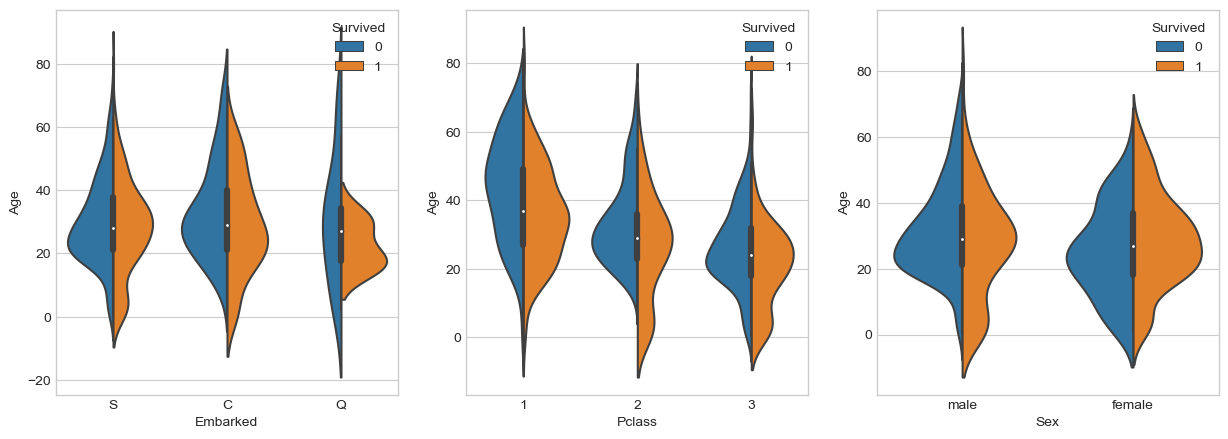

In [37]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df_train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, split=True, ax=ax3)

In [38]:
total_survived = df_train[df_train['Survived']==1]
total_not_survived = df_train[df_train['Survived']==0]

male_survived = df_train[(df_train['Survived']==1) & (df_train['Sex']=="male")]
female_survived = df_train[(df_train['Survived']==1) & (df_train['Sex']=="female")]

male_not_survived = df_train[(df_train['Survived']==0) & (df_train['Sex']=="male")]
female_not_survived = df_train[(df_train['Survived']==0) & (df_train['Sex']=="female")]

#### A partir de las figuras de abajo podemos observar lo siguiente:

> Combinando tanto hombres como mujeres, podemos ver que los niños de entre 0 y 5 años tienen una mejor probabilidad de sobrevivir.

> Las mujeres de entre 18 y 40 años, y de 50 años en adelante, tienen una mayor probabilidad de sobrevivir.

> Los hombres de entre 0 y 14 años tienen una mejor probabilidad de sobrevivir.

<AxesSubplot:xlabel='Age', ylabel='Density'>

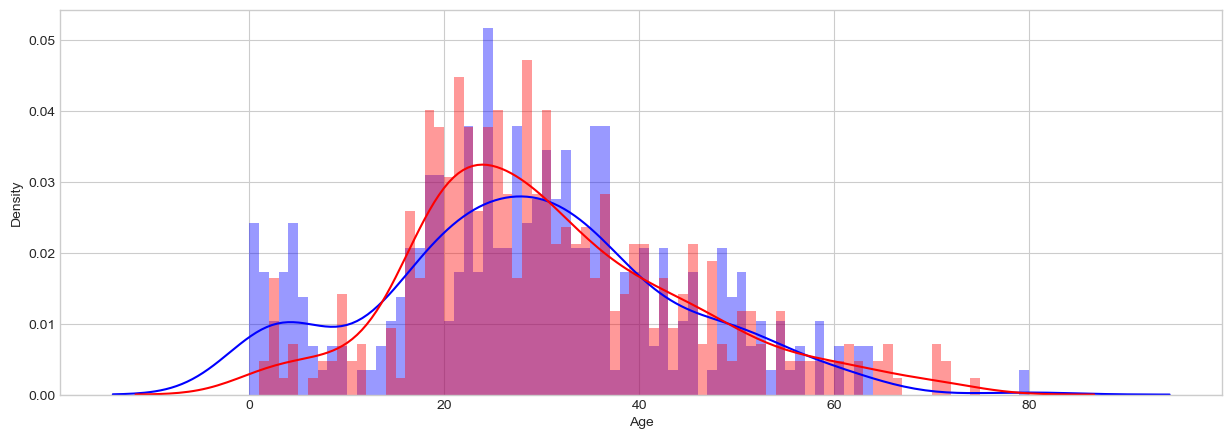

In [39]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Age')

<AxesSubplot:xlabel='Male Age', ylabel='Density'>

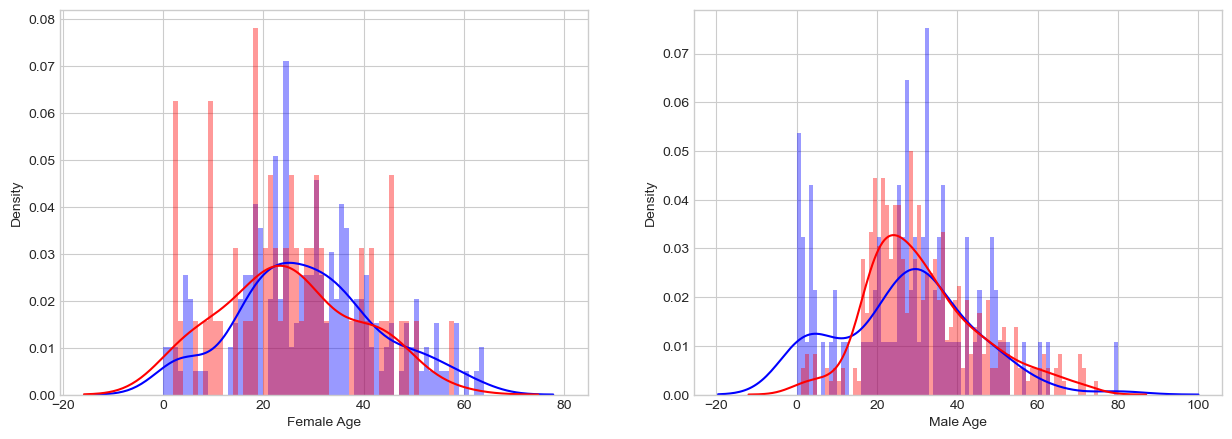

In [40]:
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Male Age')

### Matriz de correlaciones

<AxesSubplot:>

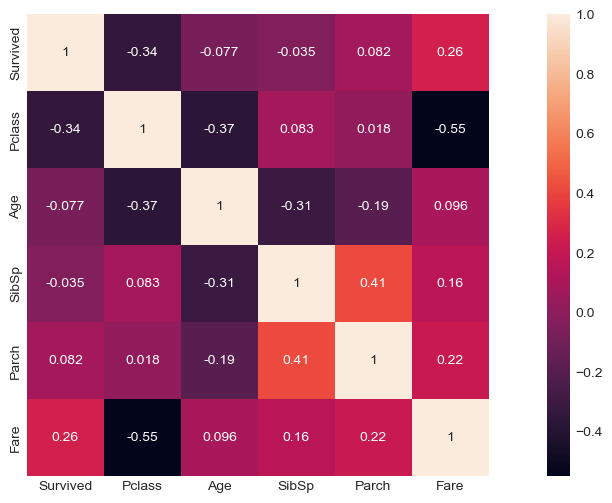

In [41]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train.drop('PassengerId',axis=1).corr(),square = True, annot=True)

> Mapa de calor de correlación entre las distintas variables

> Números positivos: Correlación positiva, es decir, el aumento en una variable aumentará la otra variable y viceversa

> Números negativos: Correlación negativa, es decir, el aumento en una variable disminuirá la otra variable y viceversa

> En este caso nos enfocamos en qué atributos tienen una correlación positiva o negativa fuerte con el vector objetivo survived

#### Feature extraction

> Seleccionaremos los atributos adecuados para entrenar nuestros modelos

> Crearemos nuevos atributos basados en los ya existentes

> Convertiremos las variables categóricas en forma numérica

In [42]:
# combinemos ambos dataset, df_train y df_test

df_train_test = [df_train, df_test]


### Name Feature

In [43]:
# crearemos una nueva columna que contenga el título de cada pasajero
for dataset in df_train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')

In [44]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


> Reemplazamos los títulos menos comunes en "other" y correjimos algunos errores

In [45]:
for dataset in df_train_test:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt',
 	'Don', 'Major', 'Jonkheer', 'Dona', 'Sir'], 'Other')


In [46]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Col,0,2
Dr,1,6
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Other,2,6
Rev,0,6


Title   Survived
Col     0             1
        1             1
Dr      0             4
        1             3
Master  0            17
        1            23
Miss    0            55
        1           130
Mr      0           436
        1            81
Mrs     0            26
        1           100
Other   0             4
        1             4
Rev     0             6
dtype: int64

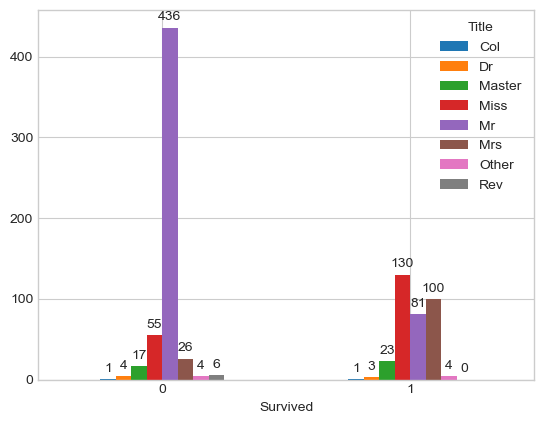

In [47]:
cant_y_graph ("Title", "Survived", df_train)

,Title,Survived
0,Col,0.500000
1,Dr,0.428571
2,Master,0.575000
3,Miss,0.702703
4,Mr,0.156673
5,Mrs,0.793651
6,Other,0.500000
7,Rev,0.000000


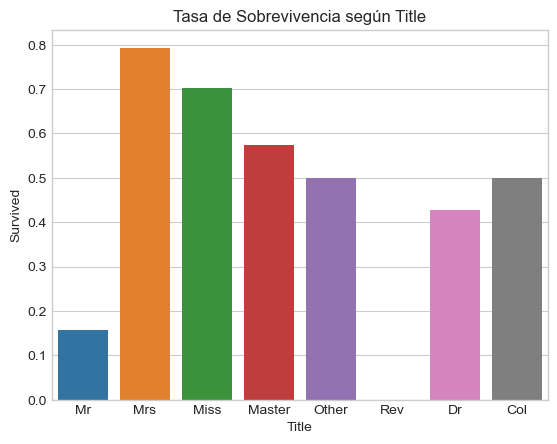

In [48]:
tasa_y_graph ("Title", "Survived", df_train)

In [49]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


### Sex Feature

> Procederemos a binarizar esta variable

In [50]:
for i in df_train_test :
    i['Sex'] = i['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [51]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,Mr


### Embarked feature

> Recordemos que este atributo tiene 2 valores nulos en el conjunto de entrenamiento, por lo que imputaremos esos valores nulos por la moda

> Recodificaremos este atributo a uno numérico

In [52]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [53]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
for dataset in df_train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna("S")

In [389]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Age Feature

> Observamos que hay 177 valores nulos en age, por lo que las imputaremos con valores random entre (edad media - desv std edad) y (edad media + desv std edad)



In [390]:
for dataset in df_train_test:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)




In [391]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [392]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,42,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,C,Mr


### Fare feature

> Vemos que tenemos un dato nulo en el conjunto de prueba, por lo que lo imputaremos por la mediana



In [393]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

In [394]:
for dataset in df_train_test:
    dataset['Fare'] = dataset['Fare'].fillna(df_train['Fare'].median())

In [395]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

In [396]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,42,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,C,Mr


### SibSp y Parch feature

> Combinando estos 2 atributos crearemos uno nuevo llamado "FamilySize"

In [397]:
for dataset in df_train_test:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1



FamilySize  Survived
1           0           374
            1           163
2           0            72
            1            89
3           0            43
            1            59
4           0             8
            1            21
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
dtype: int64

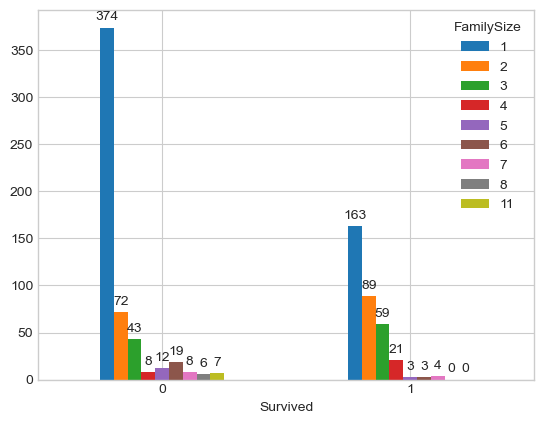

In [398]:
cant_y_graph ("FamilySize", "Survived", df_train)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


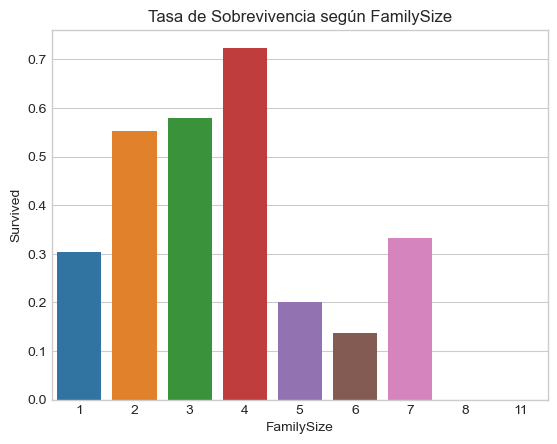

In [399]:
tasa_y_graph ("FamilySize", "Survived", df_train)

> Las familias que viajan entre 2 y 4 parientes, tienen una mejor tasa de sobrevivencia

> Los que viajan solos tienen menos chances de sobrevivencia, lo mismo sucede con las familias numerosas

> Crearemos un nuevo atributo llamado "IsAlone" para comparar como es la tasa de sobrevivencia de alguien que viaja solo con alguien que viaja en familia

In [400]:
for dataset in df_train_test:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

IsAlone  Survived
0        0           175
         1           179
1        0           374
         1           163
dtype: int64

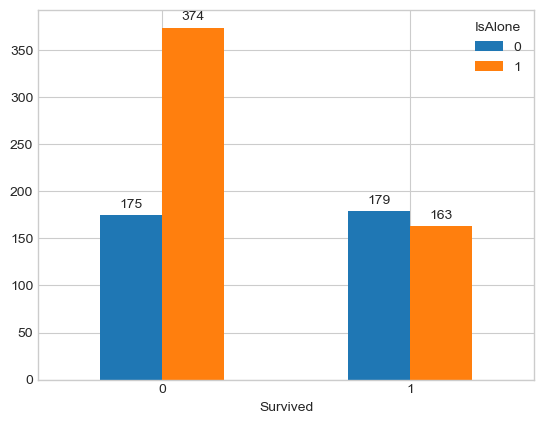

In [401]:
cant_y_graph ("IsAlone", "Survived", df_train)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


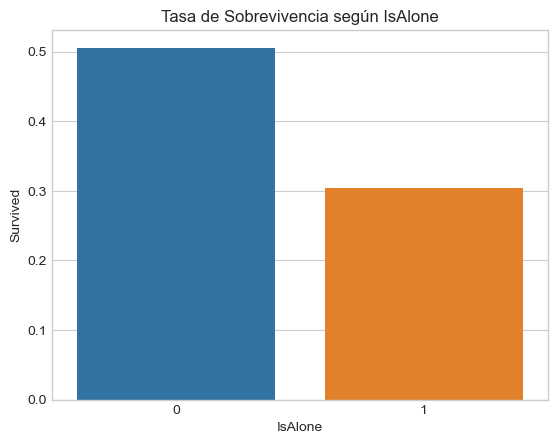

In [402]:
tasa_y_graph ("IsAlone", "Survived", df_train)

In [403]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S,Rev,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S,Miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,42,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,C,Mr,1,1


## Feature Selection

> Eliminaremos atributos innecesarios

In [404]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S,Rev,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S,Miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,42,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,C,Mr,1,1


In [405]:
variables_eliminar = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize', 'PassengerId']
df_train.drop(variables_eliminar, axis=1, inplace = True)
df_test.drop(variables_eliminar, axis=1, inplace = True)



In [406]:
df_test

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
0,3,0,34,7.8292,Q,0,Mr,1
1,3,1,47,7.0000,S,0,Mrs,0
2,2,0,62,9.6875,Q,0,Mr,1
3,3,0,27,8.6625,S,0,Mr,1
4,3,1,22,12.2875,S,1,Mrs,0
...,...,...,...,...,...,...,...,...
413,3,0,24,8.0500,S,0,Mr,1
414,1,1,39,108.9000,C,1,Other,1
415,3,0,38,7.2500,S,0,Mr,1
416,3,0,24,8.0500,S,0,Mr,1


In [407]:
df_train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22,7.2500,S,Mr,0
1,1,1,1,38,71.2833,C,Mrs,0
2,1,3,1,26,7.9250,S,Miss,1
3,1,1,1,35,53.1000,S,Mrs,0
4,0,3,0,35,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27,13.0000,S,Rev,1
887,1,1,1,19,30.0000,S,Miss,1
888,0,3,1,42,23.4500,S,Miss,0
889,1,1,0,26,30.0000,C,Mr,1


In [408]:
variables_dummies = ["Pclass", "Embarked", "Title"]

In [409]:
df_train = pd.get_dummies (df_train, columns = variables_dummies)




In [410]:
df_train

,Survived,Sex,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,0,0,22,7.2500,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,38,71.2833,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,1,26,7.9250,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,1,1,35,53.1000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,35,8.0500,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27,13.0000,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
887,1,1,19,30.0000,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
888,0,1,42,23.4500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
889,1,0,26,30.0000,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [411]:
df_test = pd.get_dummies (df_test, columns = variables_dummies)

In [412]:
df_test

,Sex,Age,Fare,Survived,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,0,34,7.8292,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1,1,47,7.0000,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,62,9.6875,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,0,27,8.6625,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,1,22,12.2875,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,24,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
414,1,39,108.9000,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0
415,0,38,7.2500,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
416,0,24,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


## Modelación

In [413]:
X_train = df_train.drop ("Survived", axis = 1)
y_train = df_train["Survived"]
X_test = df_test.drop ("Survived", axis = 1)
y_test = df_test["Survived"]

> A día de hoy, hay demasiados algoritmos de clasificación, escogeremos los siguientes para nuestro problema:
- Logistic Regression
- Support Vector Machines (SVC)
- Linear SVC
- k-Nearest Neighbor (KNN)
- Decision Tree
- Random Forest
- Naive Bayes (GaussianNB)
- Perceptron
- Stochastic Gradient Descent (SGD)

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

## 1era iteración

In [415]:
def model_1 (model, X_train, y_train, X_test, y_test) :
    model_fit = model.fit(X_train, y_train)
    model_predict = model_fit.predict(X_test)
    print (classification_report(y_test, model_predict))

In [416]:
model_list = [LogisticRegression(random_state = 42),
              SVC(random_state = 42), 
              LinearSVC(random_state = 42), 
              KNeighborsClassifier(), 
              DecisionTreeClassifier(random_state = 42), 
              RandomForestClassifier(random_state = 42),
              GaussianNB(), 
              Perceptron(random_state = 42), 
              SGDClassifier(random_state = 42)]

In [417]:
for i in model_list :
    print (f"Métricas para el modelo: {i}\n")
    model_1(i, X_train, y_train, X_test, y_test)
    print ("--"*40)

Métricas para el modelo: LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       260
           1       0.82      0.83      0.83       158

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418

--------------------------------------------------------------------------------
Métricas para el modelo: SVC(random_state=42)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       260
           1       0.67      0.32      0.43       158

    accuracy                           0.68       418
   macro avg       0.68      0.61      0.60       418
weighted avg       0.68      0.68      0.65       418

--------------------------------------------------------------------------------
Métricas para el modelo: LinearSVC(random_state=42)

              precisio

## 2da y 3era iteración, con búsqueda con grilla

> Se decide por no seguir utilizando ni Perceptron ni SVC ni SGD por su bajo accuracy

## Logistic Regression

In [418]:
model_lr_2 = LogisticRegression (random_state = 42)

param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'],
    'max_iter': [100, 200, 500]
}

model_lr_2_grid = GridSearchCV(model_lr_2, param_grid, cv=5, n_jobs=-1)

model_lr_2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag']})

In [419]:
model_lr_2_grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [420]:
yhat_lr_2 = model_lr_2_grid.predict(X_test)
print(classification_report(y_test, yhat_lr_2))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       260
           1       0.82      0.83      0.82       158

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418



In [421]:
model_lr_3 = LogisticRegression (random_state = 42)

param_grid_3 = {
    'penalty': ['l2'],
    'C': [1, 10, 100],
    'solver': ['lbfgs'],
    'max_iter': [1, 10, 100]
}

model_lr_3_grid = GridSearchCV(model_lr_3, param_grid, cv=5, n_jobs=-1)

model_lr_3_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag']})

In [422]:
model_lr_3_grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [423]:
yhat_lr_3 = model_lr_3_grid.predict(X_test)
print(classification_report(y_test, yhat_lr_3))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       260
           1       0.82      0.83      0.82       158

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418



## Linear SVC

In [424]:
model_lsvc_2 = LinearSVC(random_state = 42)

param_grid = {
    'C': [0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [True, False]
}

model_lsvc_2_grid = GridSearchCV (model_lsvc_2, param_grid, cv = 5, n_jobs = -1)

model_lsvc_2_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [425]:
model_lsvc_2_grid.best_params_

{'C': 0.1, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [426]:
yhat_lsvc_2 = model_lsvc_2_grid.predict(X_test)
print(classification_report(y_test, yhat_lsvc_2))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       260
           1       0.81      0.82      0.82       158

    accuracy                           0.86       418
   macro avg       0.85      0.85      0.85       418
weighted avg       0.86      0.86      0.86       418



In [427]:
model_lsvc_3 = LinearSVC(random_state = 42)

param_grid = {
    'C': [0.001, 0.01, 0.1],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [True, False]
}

model_lsvc_3_grid = GridSearchCV (model_lsvc_3, param_grid, cv = 5, n_jobs = -1)

model_lsvc_3_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1], 'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [428]:
model_lsvc_3_grid.best_params_

{'C': 0.1, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [429]:
yhat_lsvc_3 = model_lsvc_3_grid.predict(X_test)
print(classification_report(y_test, yhat_lsvc_3))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       260
           1       0.81      0.82      0.82       158

    accuracy                           0.86       418
   macro avg       0.85      0.85      0.85       418
weighted avg       0.86      0.86      0.86       418



## Kneighbors

In [430]:
model_knc_2 = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

model_knc_2_grid = GridSearchCV (model_knc_2, param_grid, cv = 5, n_jobs = -1)

model_knc_2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [431]:
model_knc_2_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [432]:
yhat_knc_2 = model_knc_2_grid.predict(X_test)
print(classification_report(y_test, yhat_knc_2))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       260
           1       0.73      0.79      0.76       158

    accuracy                           0.81       418
   macro avg       0.80      0.81      0.80       418
weighted avg       0.81      0.81      0.81       418



In [433]:
model_knc_3 = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [2, 3, 4],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [0, 1]
}

model_knc_3_grid = GridSearchCV (model_knc_3, param_grid, cv = 5, n_jobs = -1)

model_knc_3_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4], 'p': [0, 1],
                         'weights': ['uniform', 'distance']})

In [434]:
model_knc_3_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

In [435]:
yhat_knc_3 = model_knc_3_grid.predict(X_test)
print(classification_report(y_test, yhat_knc_3))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       260
           1       0.78      0.61      0.68       158

    accuracy                           0.79       418
   macro avg       0.79      0.75      0.76       418
weighted avg       0.79      0.79      0.78       418



## Decision Tree Classifier

In [436]:
model_dec_2 = DecisionTreeClassifier(random_state = 42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

model_dec_2_grid = GridSearchCV (model_dec_2, param_grid, cv = 5, n_jobs = -1)

model_dec_2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]})

In [437]:
model_dec_2_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [438]:
yhat_dec_2 = model_dec_2_grid.predict(X_test)
print(classification_report(y_test, yhat_dec_2))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       260
           1       0.86      0.82      0.84       158

    accuracy                           0.88       418
   macro avg       0.88      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418



In [439]:
model_dec_3 = DecisionTreeClassifier(random_state = 42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [4, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

model_dec_3_grid = GridSearchCV (model_dec_3, param_grid, cv = 5, n_jobs = -1)

model_dec_3_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 5, 10],
                         'min_samples_split': [1, 2, 3]})

In [440]:
model_dec_3_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [441]:
yhat_dec_3 = model_dec_3_grid.predict(X_test)
print(classification_report(y_test, yhat_dec_3))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       260
           1       0.98      0.72      0.83       158

    accuracy                           0.89       418
   macro avg       0.92      0.86      0.88       418
weighted avg       0.90      0.89      0.89       418



## Random Forest

In [442]:
model_rf_2 = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

model_rf_2_grid = GridSearchCV (model_rf_2, param_grid, cv = 5, n_jobs = -1)

model_rf_2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [443]:
model_rf_2_grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [444]:
yhat_rf_2 = model_rf_2_grid.predict(X_test)
print(classification_report(y_test, yhat_rf_2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       260
           1       0.93      0.89      0.91       158

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.93       418
weighted avg       0.93      0.93      0.93       418



In [445]:
model_rf_3 = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators': [150, 200, 250],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [0.01, 0.1, 1],
    'max_features': ['auto', 'sqrt', 'log2']
}

model_rf_3_grid = GridSearchCV (model_rf_3, param_grid, cv = 5, n_jobs = -1)

model_rf_3_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [0.01, 0.1, 1],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [150, 200, 250]})

In [446]:
model_rf_3_grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [447]:
yhat_rf_3 = model_rf_3_grid.predict(X_test)
print(classification_report(y_test, yhat_rf_3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       260
           1       0.93      0.89      0.91       158

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.93       418
weighted avg       0.93      0.93      0.93       418



## Gaussian NB

In [448]:
model_gnb_2 = GaussianNB()

param_grid = {
    'priors': [None, [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]
}

model_gnb_2_grid = GridSearchCV (model_gnb_2, param_grid, cv = 5, n_jobs = -1)

model_gnb_2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]})

In [449]:
model_gnb_2_grid.best_params_

{'priors': None}

In [450]:
yhat_gnb_2 = model_gnb_2_grid.predict(X_test)
print(classification_report(y_test, yhat_gnb_2))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       260
           1       0.70      0.96      0.81       158

    accuracy                           0.83       418
   macro avg       0.83      0.85      0.83       418
weighted avg       0.87      0.83      0.83       418



> En definitiva, los mejores modelos son Decision tree y random forest con un 0,89 y 0,92 de accuracy, respectivamente